<a href="https://colab.research.google.com/github/HoneyDew21/SHAP-Explainable-AI-Stock-Prediction/blob/main/ExAI_StockPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Quandl   #API for fetching stock data
!pip install shap     #ExAI library

In [ ]:
import pandas as pd   #For data related tasks
import matplotlib.pyplot as plt    #For data visualization
import shap  #For ExAI
import quandl      #Stock market API for fetching Data
from sklearn.preprocessing import StandardScaler   #For scaling data
from sklearn.linear_model import LinearRegression   #Model functions

In [ ]:
quandl.ApiConfig.api_key = 'nVsEFCoZZeNZ3is2Pz8M'    #Enter your Quandl API key
stock_data = quandl.get('NSE/TCS', start_date='2018-01-01', end_date='2019-01-31')   #Period of duration

In [ ]:
#Print to see the data values
print(stock_data)

              Open     High      Low     Last    Close  Total Trade Quantity  \
Date                                                                           
2018-01-01  2682.3  2694.80  2635.00  2650.00  2645.60              675880.0   
2018-01-02  2660.0  2669.60  2620.20  2631.00  2631.20              960145.0   
2018-01-03  2632.0  2669.00  2631.20  2639.00  2638.65              628560.0   
2018-01-04  2650.0  2662.00  2640.00  2650.00  2657.10              456541.0   
2018-01-05  2650.0  2699.50  2650.00  2695.00  2689.20              576853.0   
...            ...      ...      ...      ...      ...                   ...   
2018-12-31  1908.0  1909.00  1886.15  1894.75  1893.05             1879740.0   
2019-01-01  1896.0  1910.00  1885.00  1905.90  1902.80             1094883.0   
2019-01-02  1905.0  1934.45  1900.00  1919.00  1923.30             2100463.0   
2019-01-03  1919.0  1944.95  1893.10  1901.00  1899.95             2611668.0   
2019-01-04  1900.0  1901.20  1841.00  18

In [ ]:
dataset = pd.DataFrame(stock_data)

In [ ]:
dataset.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-01-01,2682.3,2694.8,2635.0,2650.0,2645.60,675880.0,17944.18
2018-01-02,2660.0,2669.6,2620.2,2631.0,2631.20,960145.0,25358.00
2018-01-03,2632.0,2669.0,2631.2,2639.0,2638.65,628560.0,16651.86
2018-01-04,2650.0,2662.0,2640.0,2650.0,2657.10,456541.0,12098.07
2018-01-05,2650.0,2699.5,2650.0,2695.0,2689.20,576853.0,15488.21


In [ ]:
dataset.to_csv('TCS.csv')     ##Converting into csv

In [ ]:
data = pd.read_csv('TCS.csv')     #Reading csv

In [ ]:
data.head()    # Dataframe values

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-01-01,2682.3,2694.8,2635.0,2650.0,2645.60,675880.0,17944.18
1,2018-01-02,2660.0,2669.6,2620.2,2631.0,2631.20,960145.0,25358.00
2,2018-01-03,2632.0,2669.0,2631.2,2639.0,2638.65,628560.0,16651.86
3,2018-01-04,2650.0,2662.0,2640.0,2650.0,2657.10,456541.0,12098.07
4,2018-01-05,2650.0,2699.5,2650.0,2695.0,2689.20,576853.0,15488.21


In [ ]:
data.describe

<bound method NDFrame.describe of            Date    Open     High      Low     Last    Close  \
0    2018-01-01  2682.3  2694.80  2635.00  2650.00  2645.60   
1    2018-01-02  2660.0  2669.60  2620.20  2631.00  2631.20   
2    2018-01-03  2632.0  2669.00  2631.20  2639.00  2638.65   
3    2018-01-04  2650.0  2662.00  2640.00  2650.00  2657.10   
4    2018-01-05  2650.0  2699.50  2650.00  2695.00  2689.20   
..          ...     ...      ...      ...      ...      ...   
245  2018-12-31  1908.0  1909.00  1886.15  1894.75  1893.05   
246  2019-01-01  1896.0  1910.00  1885.00  1905.90  1902.80   
247  2019-01-02  1905.0  1934.45  1900.00  1919.00  1923.30   
248  2019-01-03  1919.0  1944.95  1893.10  1901.00  1899.95   
249  2019-01-04  1900.0  1901.20  1841.00  1882.00  1876.85   

     Total Trade Quantity  Turnover (Lacs)  
0                675880.0         17944.18  
1                960145.0         25358.00  
2                628560.0         16651.86  
3                456541.0    

In [ ]:
data.isnull().sum()    #Checking to see any null values

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


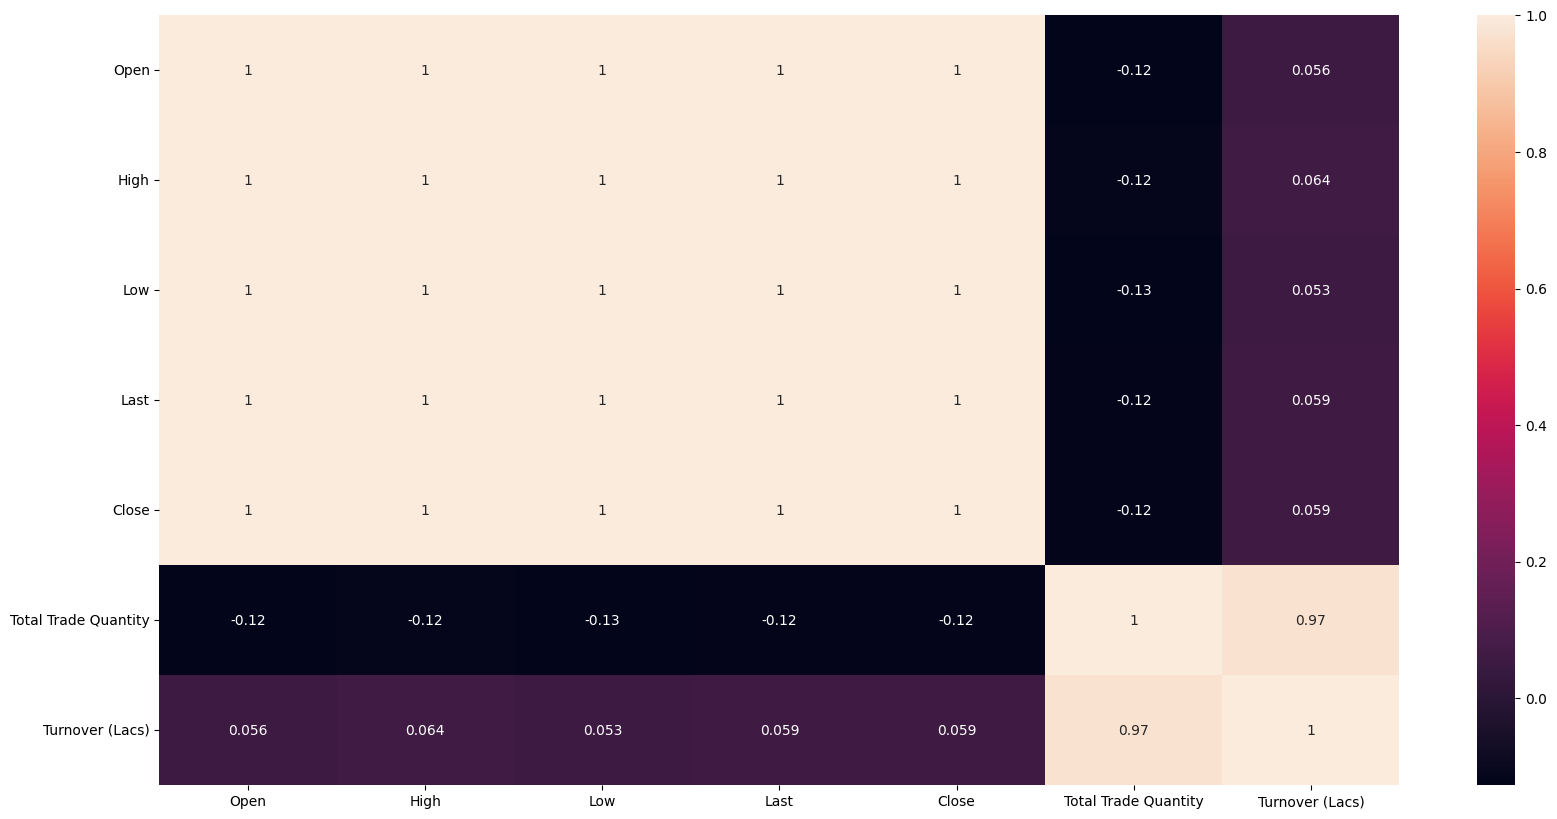

In [ ]:
import seaborn as sns
plt.figure(1 , figsize = (20 , 10))
corr = sns.heatmap(data.corr(), annot = True)

In [ ]:
#Selecting independent and dependent features
x1 = data.loc[:,'High':'Turnover (Lacs)']
y = data.loc[:,'Open']
object= StandardScaler()

In [ ]:
x = object.fit_transform(x1)
print(x)

[[ 0.4109893   0.41196329  0.38748503  0.379115   -0.58368884 -0.48121537]
 [ 0.369332    0.38678328  0.35557012  0.35495285 -0.49679699 -0.39671969]
 [ 0.36834016  0.40549815  0.36900798  0.36745341 -0.59815324 -0.49594401]
 ...
 [-0.84592065 -0.8385303  -0.84039934 -0.83285215 -0.14823368 -0.22540081]
 [-0.82856344 -0.85026963 -0.87063452 -0.87203176  0.00802739 -0.11516945]
 [-0.90088514 -0.93891006 -0.90254943 -0.91079189  0.51825329  0.2262365 ]]


In [ ]:
x1.head()    # x is independent variable

,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2694.8,2635.0,2650.0,2645.60,675880.0,17944.18
1,2669.6,2620.2,2631.0,2631.20,960145.0,25358.00
2,2669.0,2631.2,2639.0,2638.65,628560.0,16651.86
3,2662.0,2640.0,2650.0,2657.10,456541.0,12098.07
4,2699.5,2650.0,2695.0,2689.20,576853.0,15488.21


In [ ]:
y.head()     #  y is dependent variable

0    2682.3
1    2660.0
2    2632.0
3    2650.0
4    2650.0
Name: Open, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split       #Importing train test split function from sklearn library
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 00)      #Splitting parameters

In [ ]:
y_train

215    1864.00
70     3116.00
103    1754.00
161    2035.10
183    2141.90
        ...   
94     3528.70
192    1985.00
71     3187.65
87     3502.95
179    2077.00
Name: Open, Length: 175, dtype: float64

In [ ]:
y_test

39     3041.0
191    2100.0
166    2082.3
83     3492.0
218    1902.0
        ...  
140    2015.0
15     2961.0
118    1827.0
38     3075.0
68     3010.0
Name: Open, Length: 75, dtype: float64

In [ ]:
LR = LinearRegression()     #Regression Model

In [ ]:
LR.fit(x_train,y_train)     #Regression Model Fitting

LinearRegression()

In [ ]:
y_pred= LR.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))    # R-squared score

0.9991826970032636


In [ ]:
print(mean_squared_error(y_test, y_pred))    #Mean Squared Error Score


288.24574916183667


In [ ]:
y_test

39     3041.0
191    2100.0
166    2082.3
83     3492.0
218    1902.0
        ...  
140    2015.0
15     2961.0
118    1827.0
38     3075.0
68     3010.0
Name: Open, Length: 75, dtype: float64

In [ ]:
test_arr= y_test.values

In [ ]:
type(test_arr)

numpy.ndarray

In [ ]:
type(y_pred)

numpy.ndarray

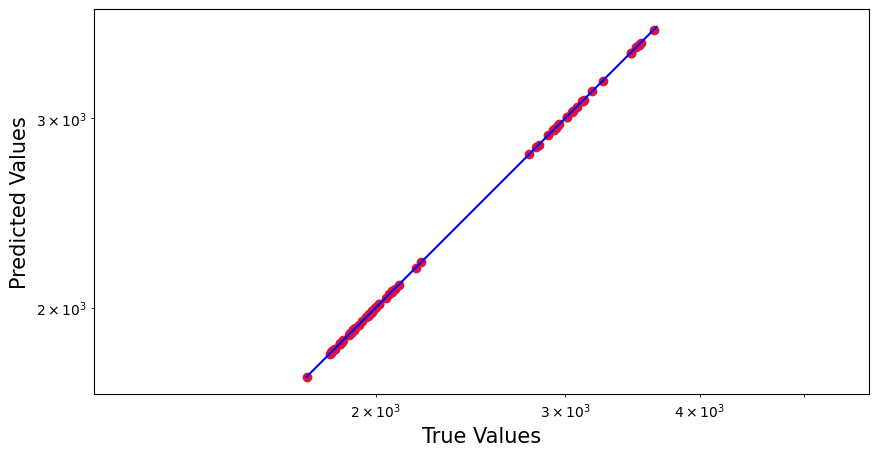

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(test_arr, test_arr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(test_arr))
p2 = min(min(y_pred), min(test_arr))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

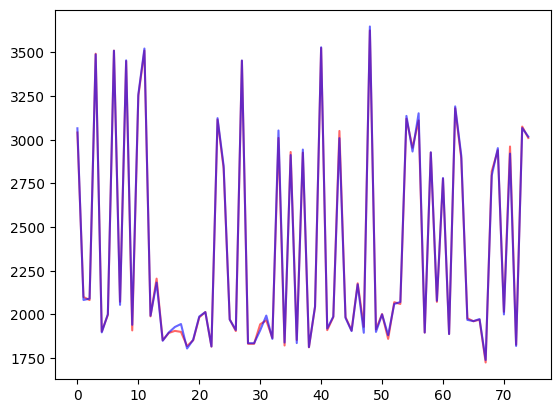

In [ ]:
#importing library
import matplotlib.pyplot as plt

plt.plot(test_arr ,color='red',alpha=0.6)
plt.plot(y_pred,color='blue',alpha=0.6)
plt.show()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=15, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = xg_model.predict(x_test)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 18289.722773796017
R-squared Score: 0.9481406221046846


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=200).fit(x_train, y_train)
print(f"Ridge Regression-Training set score: {ridge.score(x_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(x_test, y_test):.2f}")

Ridge Regression-Training set score: 0.95
Ridge Regression-Test set score: 0.95


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=200).fit(x_train, y_train)
print(f"Lasso Regression-Training set score: {lasso.score(x_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(x_test, y_test):.2f}")

Lasso Regression-Training set score: 0.88
Lasso Regression-Test set score: 0.88


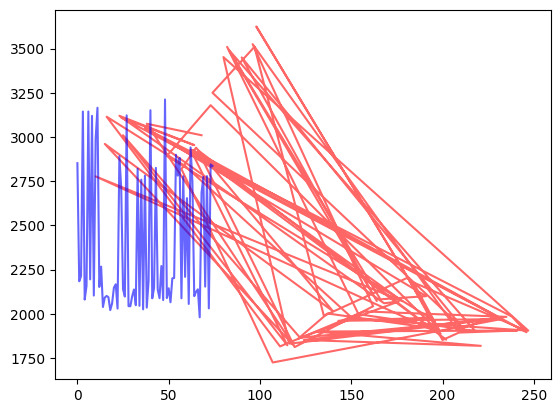

In [ ]:
y_pred_lasso = lasso.predict(x_test)
plt.plot(y_test ,color='red',alpha=0.6)
plt.plot(y_pred_lasso ,color='blue',alpha=0.6)
plt.show()

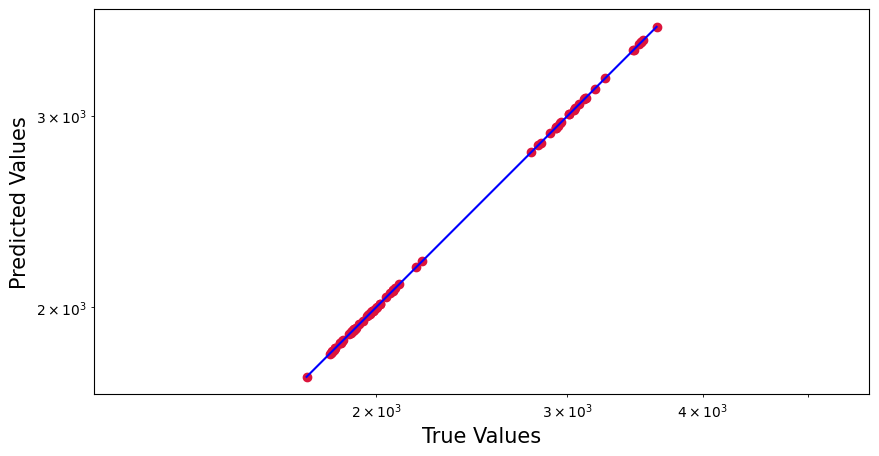

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(test_arr, test_arr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_lasso), max(test_arr))
p2 = min(min(y_pred_lasso), min(test_arr))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(xg_model)
# Calculate Shap values
shap_values = explainer.shap_values(x_train)
feature_names = [f"feature {i}" for i in range(x.shape[1])]

[14:25:34] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [ ]:
feature_names = list(stock_data.columns)
print(feature_names)

['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity', 'Turnover (Lacs)']


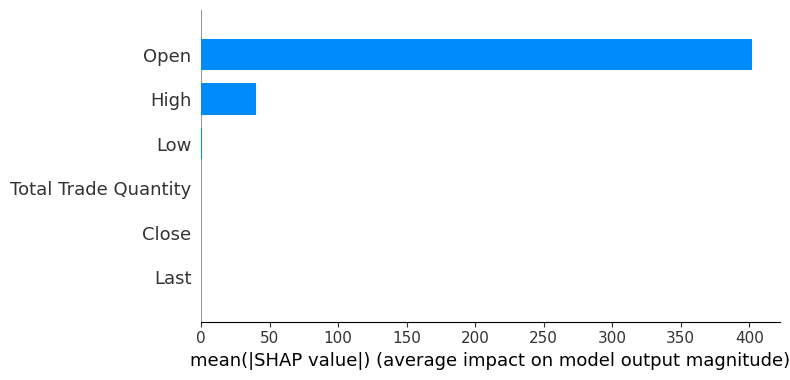

In [ ]:
shap.summary_plot(shap_values, x_train, feature_names, plot_type="bar")

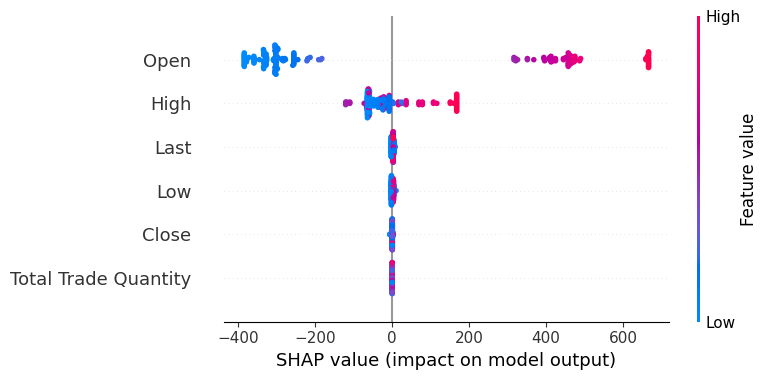

In [ ]:
shap.summary_plot(shap_values, x_train, feature_names)

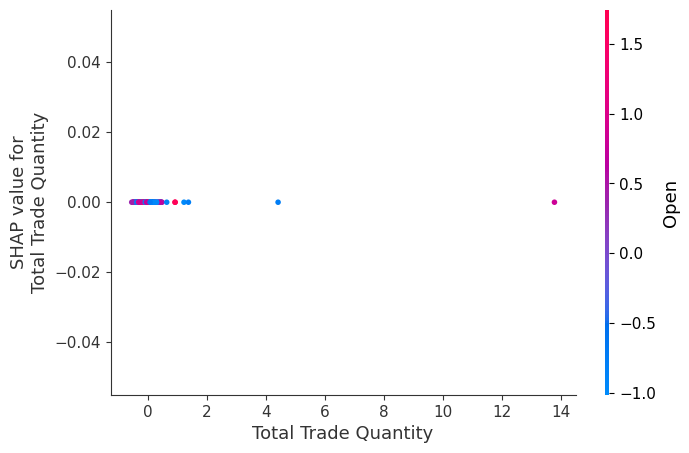

In [ ]:
shap.dependence_plot(5, shap_values, x_train, feature_names)